<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Amir Hossein Yari

**Student ID**: 99102507

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
df = pd.read_csv('q1.csv')
X = df.iloc[:,:8]
Y = df.loc[:,["Y1"]]
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: In summary, data normalization is crucial in machine learning to mitigate the problems caused by differing scales, improve convergence, ensure numerical stability, enable meaningful comparisons, and enhance the performance and interpretability of various learning algorithms.

In [84]:
### START CODE HERE ###
X = X.to_numpy()
Y = Y.to_numpy()
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()
Y = (Y - Y.mean()) / Y.std()
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [85]:
### START CODE HERE ###
X = np.append(np.zeros([X.shape[0],1]),X,axis=1)
### END CODE HERE ###

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

$$\mathcal{L}(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^\top \mathbf{x}_i - y_i)^2 = \frac{1}{m} (\mathbf{X} \mathbf{w} - \mathbf{y})^\top (\mathbf{X} \mathbf{w} - \mathbf{y})$$

In [118]:
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###]
  loss = np.mean((X @ w - Y)**2)
  ### END CODE HERE ###
  return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer: 
$$\mathcal{L}(\mathbf{w}) = \frac{1}{m} (\mathbf{X} \mathbf{w} - \mathbf{y})^\top (\mathbf{X} \mathbf{w} - \mathbf{y}) = \frac{1}{m} (\mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} - 2 \mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{y}^\top \mathbf{y})$$
$$\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}} = \frac{2}{m} (\mathbf{X}^\top \mathbf{X} \mathbf{w} - \mathbf{X}^\top \mathbf{y}) = \mathbf{0}$$
$$\mathbf{X}^\top \mathbf{X} \mathbf{w} - \mathbf{X}^\top \mathbf{y} = \mathbf{0}$$
$$\mathbf{X}^\top \mathbf{X} \mathbf{w} = \mathbf{X}^\top \mathbf{y}$$
$$(\mathbf{X}^\top \mathbf{X})^{-1} (\mathbf{X}^\top \mathbf{X} \mathbf{w}) = (\mathbf{X}^\top \mathbf{X})^{-1} (\mathbf{X}^\top \mathbf{y})$$
$$\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\dagger \mathbf{y}$$

In [106]:
def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  w = np.linalg.pinv(X) @ Y
  ### END CODE HERE ###
  return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [119]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is 0.08379791780841635


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**: 
$$\mathcal{L}(\mathbf{w}) = \frac{1}{m} (\mathbf{X} \mathbf{w} - \mathbf{y})^\top (\mathbf{X} \mathbf{w} - \mathbf{y}) = \frac{1}{m} (\mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} - 2 \mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{y}^\top \mathbf{y})$$
$$\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}} = \frac{2}{m} (\mathbf{X}^\top \mathbf{X} \mathbf{w} - \mathbf{X}^\top \mathbf{y})$$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [91]:
def gradient(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  grad = None
  ### START CODE HERE ###
  grad = (2/m) * (X.T @ X @ w - X.T @Y)
  ### END CODE HERE ###
  return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [142]:
# Adding w as an input is so that in the next step the initial value of w is the same for different learning rates, so that our observations are more accurate.
def gradient_descent(X, Y, alpha, num_iter, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  ### START CODE HERE ###
  if w is None:
      w = np.random.randn(n)
  loss_history = np.zeros(num_iter)
  for i in range(num_iter):
        loss_history[i] = loss(X, Y, w)
        w = w - alpha * gradient(X, Y, w)
  ### END CODE HERE ###
  return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: 
The effect of the learning rate on the loss in gradient descent can be summarized as follows:
1. Convergence Speed: The learning rate determines how quickly the algorithm converges to the optimal solution. A higher learning rate allows for larger steps in the parameter space, leading to faster convergence. However, if the learning rate is too high, the algorithm may overshoot the optimal solution and fail to converge.
2. Loss Fluctuations: In practice, using a high learning rate can lead to oscillations or fluctuations in the loss function. The algorithm might overshoot the optimal solution and keep bouncing back and forth around it, failing to converge. This is often referred to as "diverging" or "blowing up" due to an excessively high learning rate. To avoid such instability, it is essential to choose an appropriate learning rate.
3. Local Minima and Plateaus: Gradient descent can get stuck in local minima or flat plateaus, where the loss function remains relatively constant. With a high learning rate, the algorithm may have enough momentum to escape shallow local minima and reach a better solution. However, a low learning rate might cause the algorithm to get trapped in these areas, preventing it from finding the global minimum.
4. Overshooting and Fine-tuning: A high learning rate can cause overshooting, where the algorithm jumps past the optimal solution and continues to oscillate.
5. Regularization Impact: Learning rate can interact with regularization techniques like L1 or L2 regularization. Higher learning rates may counteract the effect of regularization, leading to underfitting, while lower learning rates can complement regularization by allowing the model to explore a wider parameter space.

According to the below graph the best value of learning rate is 1e-1 or 0.1. By choosing this learning rate, convergence occurs with a good speed.

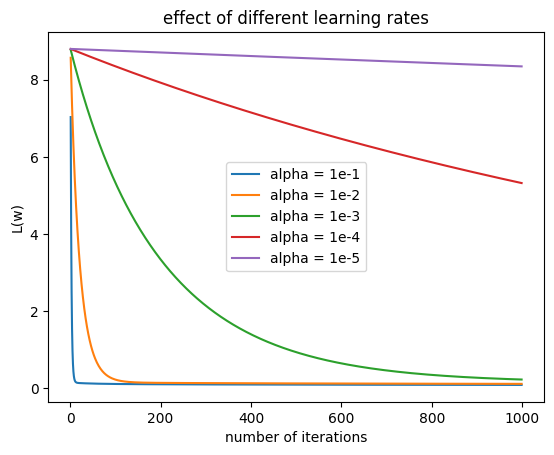

In [143]:
### START CODE HERE ###
# initialize w with random number
w0 = np.random.randn(X.shape[1])
# apply gradient_descent function in diffrent learning rate
w1, loss_history1 = gradient_descent(X, Y, 1e-1, 1000, w0)
w2, loss_history2 = gradient_descent(X, Y, 1e-2, 1000, w0)
w3, loss_history3 = gradient_descent(X, Y, 1e-3, 1000, w0)
w4, loss_history4 = gradient_descent(X, Y, 1e-4, 1000, w0)
w5, loss_history5 = gradient_descent(X, Y, 1e-5, 1000, w0)
# plotting (I do not include L(w) of step zero in the graph because its large value disturbs the scaling of the graph.)
plt.figure()
plt.plot(np.arange(1, 1000), loss_history1[1:1000], label='alpha = 1e-1')
plt.plot(np.arange(1, 1000), loss_history2[1:1000], label='alpha = 1e-2')
plt.plot(np.arange(1, 1000), loss_history3[1:1000], label='alpha = 1e-3')
plt.plot(np.arange(1, 1000), loss_history4[1:1000], label='alpha = 1e-4')
plt.plot(np.arange(1, 1000), loss_history5[1:1000], label='alpha = 1e-5')
plt.xlabel('number of iterations')
plt.ylabel("L(w)")
plt.legend()
plt.title("effect of different learning rates")
plt.show()
### END CODE HERE ###

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: According to the loss's obtained from the two methods, it can be said that the direct method is better in this question due to less loss($0.0837 < 0.888$).$\\$
The direct method is preferable for small or moderate-sized problems or smooth and convex objective functions. It efficiently finds the global optimum without iterative updates, making it computationally efficient. gradient descent is more suitable for large-scale problems, non-convex or non-smooth objective functions, online learning scenarios, and deep learning models.

In [145]:
print(f"loss for this problem using gradient descent methode with best learning rate is {loss_history1[999]}")

loss for this problem using gradient descent methode with best learning rate is 0.08889040383879733


## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [158]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  k: number of data points used in each iteration
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w, loss_history = None, None 
  ### START CODE HERE ###
  w = np.random.randn(n)
  loss_history = np.zeros(num_iter)
  for i in range(num_iter):
        cols = np.random.choice(m, k, replace=False)
        X_col = X[cols]
        Y_col = Y[cols]
        loss_history[i] = loss(X_col,Y_col,w)
        w = w - alpha * gradient(X_col,Y_col,w)
  ### END CODE HERE ###
  return w, loss_history

w_stoch, loss_history_stoch = stochastic_gradient_descent(X, Y, k=50, alpha=0.1, num_iter=1000)
print(f"loss for this problem using gradient descent method is {loss(X,Y,w_stoch)}")

loss for this problem using gradient descent method is 0.08696507919859263


The loss value of stochastic gradient descent is lower than gradient descent method and higher than direct method. Also, the loss value of this method is close to method gradient descent method.
$$0.0837 < 0.0869 < 0.888$$